<a href="https://colab.research.google.com/github/mishathefirst/AI-Systems-LabWork-5/blob/main/Task5_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install --upgrade pip
!pip install --upgrade scikit-learn==0.23.0

     |████████████████████████████████| 1.5MB 8.2MB/s 
  Found existing installation: pip 19.3.1
    Uninstalling pip-19.3.1:
      Successfully uninstalled pip-19.3.1
     |████████████████████████████████| 7.3 MB 7.9 MB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


In [ ]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

MNIST - датасет образцов рукописного написания цифр, является стандартом, предложенным Национальным институтом стандартов и технологий США с целью калибрации и сопоставления методов распознавания изображений с помощью машинного обучения. Образцы из набора NIST были нормализированы, прошли сглаживание и приведены к серому полутоновому изображению размером 28x28 пикселей. 

In [ ]:
from keras.datasets import mnist
(X_train, y_train), (X_pred, y_pred) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


Первый элемент

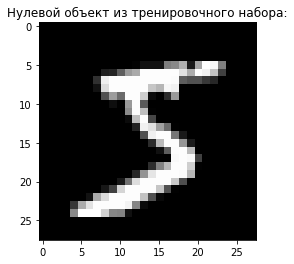

In [ ]:
plt.title("Нулевой объект из тренировочного набора:")
plt.imshow(X_train[0], cmap="gray")

И его отклик

In [ ]:
y_train[0]

5

Для разделения данных используем функцию train_test_split из библиотеки sklearn. Следующий код разделяет исходные данные в отношении 70/30.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.3, random_state=2020)


Преобразуем данные

In [ ]:
dim = 784 # 28*28 
X_train = X_train.reshape(len(X_train), dim)
X_test = X_test.reshape(len(X_test), dim)

Уменьшим размерность тестовых данных

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=80, svd_solver='full')
modelPCA = pca.fit(X_train) 

X_train = modelPCA.transform(X_train)



Найдем долю объясненной дисперсии в зависимости от количества используемых ГК

In [ ]:
explained_variance = np.round(np.cumsum(pca.explained_variance_ratio_),3)
explained_variance


array([0.098, 0.168, 0.23 , 0.284, 0.333, 0.375, 0.408, 0.437, 0.464,
       0.488, 0.509, 0.53 , 0.547, 0.564, 0.579, 0.594, 0.608, 0.62 ,
       0.632, 0.644, 0.654, 0.664, 0.674, 0.683, 0.692, 0.7  , 0.708,
       0.716, 0.724, 0.731, 0.737, 0.744, 0.75 , 0.756, 0.761, 0.767,
       0.772, 0.777, 0.781, 0.786, 0.791, 0.795, 0.799, 0.803, 0.807,
       0.811, 0.815, 0.818, 0.821, 0.825, 0.828, 0.831, 0.834, 0.837,
       0.84 , 0.842, 0.845, 0.848, 0.85 , 0.853, 0.855, 0.858, 0.86 ,
       0.862, 0.864, 0.866, 0.868, 0.87 , 0.872, 0.874, 0.876, 0.878,
       0.879, 0.881, 0.883, 0.885, 0.886, 0.888, 0.889, 0.891])

In [ ]:

for i in range(80):
  if (explained_variance[i] > 0.819):
    print (explained_variance[i])
    print (i)

0.821
48
0.825
49
0.828
50
0.831
51
0.834
52
0.837
53
0.84
54
0.842
55
0.845
56
0.848
57
0.85
58
0.853
59
0.855
60
0.858
61
0.86
62
0.862
63
0.864
64
0.866
65
0.868
66
0.87
67
0.872
68
0.874
69
0.876
70
0.878
71
0.879
72
0.881
73
0.883
74
0.885
75
0.886
76
0.888
77
0.889
78
0.891
79


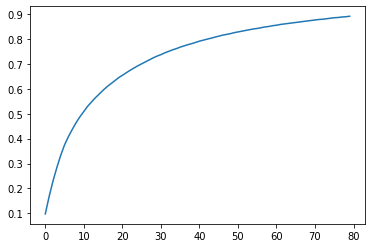

In [ ]:
plt.plot(np.arange(80), explained_variance, ls = '-')

Подключаем библиотеку для обучения многоклассового классификатора методом One-vs-All и дерево принятия решений

In [ ]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
tree = RandomForestClassifier(criterion='gini', min_samples_leaf=10, max_depth=20, n_estimators=10, random_state=2020)
clf = OneVsRestClassifier(tree).fit(X_train, y_train)

Примените полученное ранее преобразование метода главных компонент к тестовым данным

In [ ]:
len(X_test[0])

784

In [ ]:
modelPCA = pca.fit(X_test) 
X_test = modelPCA.transform(X_test)

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
CM = confusion_matrix(y_test, y_pred)

In [ ]:
CM

array([[1329,    0,   94,   60,    2,   75,   38,   35,   56,    4],
       [  11, 1827,   43,   16,   15,    9,   78,   27,   32,   17],
       [  84,   10,  860,   66,   31,   90,  469,   13,  122,   18],
       [  37,    9,   68, 1467,   20,   92,    9,   34,  106,   31],
       [   8,   20,   70,   10, 1252,   18,   81,   47,   73,  177],
       [ 169,   13,  128,  255,   57,  580,   16,   40,  306,   27],
       [  51,   27,  695,   35,   55,   22,  703,   49,  106,   23],
       [  33,   40,   15,   14,   83,   31,   89, 1347,   59,  175],
       [  46,   31,  141,  334,   65,  339,   41,   16,  637,  123],
       [  20,   22,   34,   54,  468,   51,   54,  198,  258,  665]])

Число верно классифицирвоанных объектов класс 1

In [ ]:
CM[1][1]

1827

Число объектов класс 0 отнесенных к классу 8

In [ ]:
CM[0][8]

30

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.78      0.76      1693
           1       0.91      0.88      0.90      2075
           2       0.40      0.49      0.44      1763
           3       0.63      0.78      0.70      1873
           4       0.61      0.71      0.66      1756
           5       0.44      0.36      0.40      1591
           6       0.45      0.40      0.42      1766
           7       0.75      0.71      0.73      1886
           8       0.36      0.36      0.36      1773
           9       0.53      0.36      0.43      1824

    accuracy                           0.59     18000
   macro avg       0.58      0.59      0.58     18000
weighted avg       0.59      0.59      0.59     18000

